### EXP 01: Harvard Stimulation Data _ Harnow

In [1]:
# This script shows how to call `run_domain_detector`
# and save / print the results without hitting the
# “JSON object must be str” TypeError.

import os
import sys
import json

# ------------------------------------------------------------------
# 1. Make sure Python can find your agent package / module
#    (adapt the path if your repo layout is different)
# ------------------------------------------------------------------
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
sys.path.append(ROOT_DIR)

from agents.domain_detector_wrap import run_domain_detector   # noqa: E402

🚀 Running domain detector on https://drive.google.com/uc?export=download&id=1JhsgpIulCv8Q9NPTZGhrz5-y_RUufMoO with max_cycles=5
Successfully read CSV: 3117 rows, 19 columns
Data profile built successfully
Starting analysis with max_cycles=5
domain_node {'profile': {'raw': {'n_rows': 3117, 'n_cols': 19, 'columns': {'Current Period': {'dtype': 'int64', 'unique_ratio': 0.0003, 'sample': ['9', '9', '9', '9', '9'], 'min': np.int64(9), 'max': np.int64(9), 'mean': np.float64(9.0), 'std': np.float64(0.0)}, 'Customer ID': {'dtype': 'int64', 'unique_ratio': 1.0, 'sample': ['1432', '1433', '1447', '1448', '1449'], 'min': np.int64(1432), 'max': np.int64(4548), 'mean': np.float64(2990.0), 'std': np.float64(899.9447)}, 'Periods Active': {'dtype': 'int64', 'unique_ratio': 0.0045, 'sample': ['1', '14', '4', '1', '2'], 'min': np.int64(1), 'max': np.int64(14), 'mean': np.float64(1.9673), 'std': np.float64(1.7232)}, 'Current Customer (Y/N)': {'dtype': 'object', 'unique_ratio': 0.0006, 'sample': ['N', 'Y'

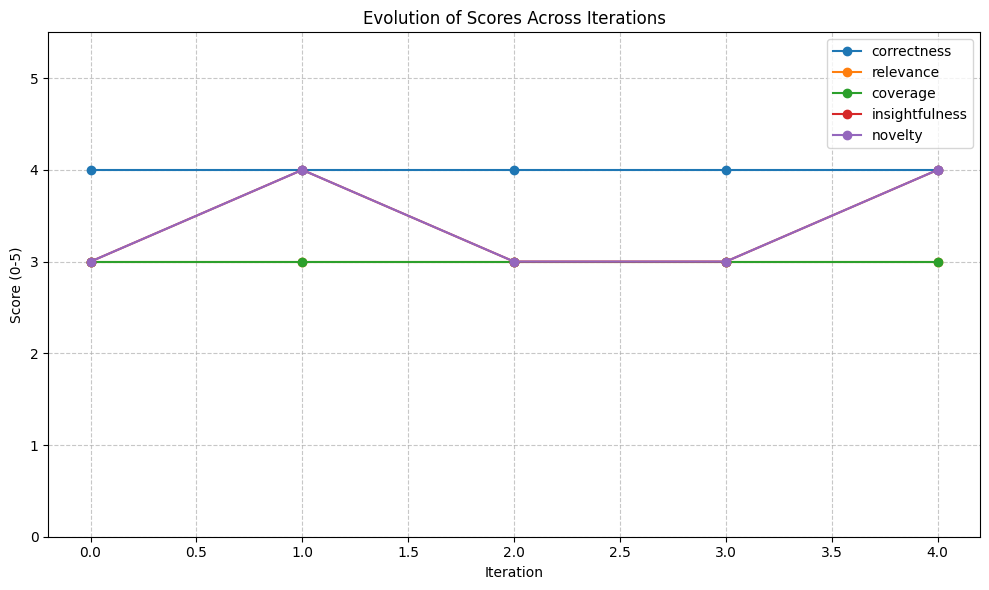


=== FINAL RESULTS ===
✅ Domain: Customer Relationship Management
✅ Core Concepts: Customer Segmentation, Customer Lifetime Value (CLV), Customer Retention, Acquisition Channels, Customer Churn, Revenue Analysis

📊 DESCRIPTIVE ANALYSIS:
The dataset provides a comprehensive view of customer interactions and characteristics within a CRM context, featuring 3,117 records and 19 attributes. Key variables include 'Customer ID', 'Periods Active', 'Current Customer (Y/N)', and 'Expected CLV'. The data reveals that the average customer has been active for approximately 2 periods, with a significant portion of customers having been acquired through external channels. The revenue distribution is notably skewed, with a mean total revenue of $56,568, indicating a few high-revenue customers. The dataset also highlights a diverse customer base across different regions and company sizes, with a notable concentration in the aerospace sector.

🔮 PREDICTIVE ANALYSIS:
Predictive analysis could focus on id

In [2]:
# This script shows how to call `run_domain_detector`
# and save / print the results with detailed history visualization

import os
import sys
import json
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------------
# 1. Make sure Python can find your agent package / module
#    (adapt the path if your repo layout is different)
# ------------------------------------------------------------------
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
sys.path.append(ROOT_DIR)

from agents.domain_detector_wrap import run_domain_detector   # noqa: E402

def visualize_history(result):
    """
    Visualize the domain detection history across iterations.
    
    Args:
        result: The result from run_domain_detector
    """
    if not result or "history" not in result or not result["history"]:
        print("No history data available")
        return
    
    # Print a nice tabular summary
    print("\n=== DOMAIN DETECTION HISTORY ===")
    
    # Sort history by iteration number to ensure proper order
    sorted_history = sorted(result["history"], key=lambda x: x.get("iteration", 0))
    
    for entry in sorted_history:
        iteration = entry.get("iteration", 0)
        
        # Skip the initial entry which might be empty
        if iteration == 0 and not entry.get("scores") and not entry.get("domain"):
            continue
            
        print(f"\n📊 ITERATION {iteration}")
        print(f"📌 Domain: {entry.get('domain', 'Unknown')}")
        
        # Format scores if they exist
        scores = entry.get("scores", {})
        if scores:
            print("📈 Scores:")
            for score_name, score_value in scores.items():
                stars = "★" * score_value + "☆" * (5 - score_value)
                print(f"   {score_name.ljust(15)}: {stars} ({score_value}/5)")
                
        # Print analysis snippet
        analysis_head = entry.get("analysis_head", "")
        if analysis_head:
            print(f"📝 Analysis: {analysis_head}...")
    
    # Plot score evolution if we have scores
    plot_score_evolution(sorted_history)

def plot_score_evolution(history):
    """
    Plot how scores evolved across iterations.
    
    Args:
        history: List of history entries
    """
    # Filter entries that have scores
    scored_entries = [entry for entry in history if entry.get("scores")]
    
    if len(scored_entries) > 1:
        import matplotlib.pyplot as plt
        
        plt.figure(figsize=(10, 6))
        
        # Prepare data for plotting
        iterations = []
        score_data = {}
        
        for entry in scored_entries:
            iter_num = entry.get("iteration", 0)
            iterations.append(iter_num)
            
            for score_name, score_value in entry.get("scores", {}).items():
                if score_name not in score_data:
                    score_data[score_name] = []
                score_data[score_name].append(score_value)
        
        # Plot each score metric
        for score_name, values in score_data.items():
            plt.plot(iterations, values, marker='o', label=score_name)
            
        plt.title("Evolution of Scores Across Iterations")
        plt.xlabel("Iteration")
        plt.ylabel("Score (0-5)")
        plt.ylim(0, 5.5)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
        plt.tight_layout()
        plt.show()

def run_and_visualize(csv_path, max_cycles=5):
    """
    Run domain detector and visualize results with history.
    
    Args:
        csv_path: Path to the CSV file
        max_cycles: Maximum number of improvement cycles
    
    Returns:
        The complete result from the domain detector
    """
    print(f"🚀 Running domain detector on {csv_path} with max_cycles={max_cycles}")
    
    # Run the domain detector
    result = run_domain_detector(csv_path, max_cycles)
    
    # Visualize history
    visualize_history(result)
    
    # Print final results
    if "analysis" in result:
        analysis = result["analysis"]
        print("\n=== FINAL RESULTS ===")
        print(f"✅ Domain: {analysis.get('domain', 'Unknown')}")
        print(f"✅ Core Concepts: {', '.join(analysis.get('core_concepts', []))}")
        
        if "analysis" in analysis:
            print("\n📊 DESCRIPTIVE ANALYSIS:")
            print(analysis["analysis"].get("descriptive", ""))
            
            print("\n🔮 PREDICTIVE ANALYSIS:")
            print(analysis["analysis"].get("predictive", ""))
            
            print("\n🌐 DOMAIN-RELATED ANALYSIS:")
            print(analysis["analysis"].get("domain_related", ""))
    
    return result

# Example usage:
result = run_and_visualize("https://drive.google.com/uc?export=download&id=1JhsgpIulCv8Q9NPTZGhrz5-y_RUufMoO", max_cycles=5)

# To save results to a file:
# with open("domain_analysis_results.json", "w") as f:
#     json.dump(result, f, indent=2)